In [1]:
pip install datasets

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install accelerate -U
!pip install transformers[torch] -U
!pip install datasets scikit-learn -U

   ---------------------------------------- 0.0/302.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/302.6 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/302.6 kB 1.4 MB/s eta 0:00:01
   ------- ------------------------------- 61.4/302.6 kB 469.7 kB/s eta 0:00:01
   ---------- ---------------------------- 81.9/302.6 kB 512.0 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/302.6 kB 438.1 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/302.6 kB 469.7 kB/s eta 0:00:01
   ------------------ ------------------- 143.4/302.6 kB 473.7 kB/s eta 0:00:01
   -------------------- ----------------- 163.8/302.6 kB 492.3 kB/s eta 0:00:01
   ------------------------ ------------- 194.6/302.6 kB 491.5 kB/s eta 0:00:01
   ------------------------- ------------ 204.8/302.6 kB 479.2 kB/s eta 0:00:01
   ------------------------------ ------- 245.8/302.6 kB 503.2 kB/s eta 0:00:01
   ---------------------------------- --- 276.5/302.6 kB 5


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/43.8 kB ? eta -:--:--
     -------------------------- ----------- 30.7/43.8 kB 660.6 kB/s eta 0:00:01
     -------------------------------------- 43.8/43.8 kB 357.2 kB/s eta 0:00:00
   ---------------------------------------- 0.0/401.7 kB ? eta -:--:--
   ------- -------------------------------- 71.7/401.7 kB 1.9 MB/s eta 0:00:01
   ------- -------------------------------- 71.7/401.7 kB 1.9 MB/s eta 0:00:01
   ---------- --------------------------- 112.6/401.7 kB 726.2 kB/s eta 0:00:01
   -------------- ----------------------- 153.6/401.7 kB 833.5 kB/s eta 0:00:01
   ------------------- ------------------ 204.8/401.7 kB 888.4 kB/s eta 0:00:01
   ----------------------- -------------- 245.8/401.7 kB 885.4 kB/s eta 0:00:01
   ---------------------------- --------- 297.0/401.7 kB 916.0 kB/s eta 0:00:01
   --------------------------------- ---- 358.4/401.7 kB 928.4 kB/s eta 0:00:01
   -------------------------------------- 401.7/401.7 kB 96


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/542.0 kB ? eta -:--:--
    --------------------------------------- 10.2/542.0 kB ? eta -:--:--
   -- ------------------------------------ 30.7/542.0 kB 435.7 kB/s eta 0:00:02
   -- ------------------------------------ 41.0/542.0 kB 326.8 kB/s eta 0:00:02
   ---- ---------------------------------- 61.4/542.0 kB 363.1 kB/s eta 0:00:02
   ----- --------------------------------- 81.9/542.0 kB 416.7 kB/s eta 0:00:02
   ------ -------------------------------- 92.2/542.0 kB 348.6 kB/s eta 0:00:02
   -------- ----------------------------- 122.9/542.0 kB 379.3 kB/s eta 0:00:02
   -------- ----------------------------- 122.9/542.0 kB 379.3 kB/s eta 0:00:02
   ---------- --------------------------- 143.4/542.0 kB 355.0 kB/s eta 0:00:02
   ------------ ------------------------- 174.1/542.0 kB 374.1 kB/s eta 0:00:01
   ------------ ------------------------- 174.1/542.0 kB 374.1 kB/s eta 0:00:01
   -------------- ----------------------- 204.8/542.0 kB 


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# Import necessary libraries
import pandas as pd
from datasets import load_dataset, DatasetDict
from sklearn.preprocessing import LabelEncoder
from transformers import AutoTokenizer, AutoConfig, AutoModelForSequenceClassification, TrainingArguments, Trainer, EarlyStoppingCallback
from transformers import AdamW
import numpy as np
import torch

In [4]:
# Load the dataset
dataset = load_dataset("csv", data_files={"train": "E:/studies/USJ FOT/lecture/Research/CodeBase/CreatingDataset/cleaned/acroeconomic_classifier_dataset_4_hypercleaned.csv"}, delimiter=',')

# Extract the labels and convert to a pandas Series to easily manipulate and check data
labels = pd.Series(dataset["train"]["label"])

# # Check if the 'label' from headers is included as data and remove it
# if 'label' in labels.values:
#     labels = labels[labels != 'label']

# Convert the cleaned labels back to a list for further processing
cleaned_labels = labels.tolist()

Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
# Initialize the encoder
label_encoder = LabelEncoder()

# Fit label encoder and return encoded labels
encoded_labels = label_encoder.fit_transform(cleaned_labels)

# Replace your dataset labels with encoded labels
# Since datasets are immutable, you need to use 'map' to apply changes
def add_encoded_labels(examples):
    examples['encoded_labels'] = encoded_labels[list(dataset["train"]["label"]).index(examples['label'])]
    return examples

# Apply the function to add the 'encoded_labels' column
dataset["train"] = dataset["train"].map(add_encoded_labels, batched=False, load_from_cache_file=False)

Map:   0%|          | 0/1091 [00:00<?, ? examples/s]

In [ ]:
# Initialize the tokenizer
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")

# Define the tokenization function
def tokenize_function(examples):
    print("Type of input:", type(examples["sentence"]))

    # Convert all items in the list to strings
    examples["sentence"] = [str(item) if not isinstance(item, str) else item for item in examples["sentence"]]

    if isinstance(examples["sentence"], list):
        print("Input is a list. All items have been converted to strings.")

    result = tokenizer.batch_encode_plus(examples["sentence"], padding="max_length", truncation=True, max_length=512)
    result["labels"] = examples["encoded_labels"]
    return result

# Apply the function to the dataset
tokenized_datasets = dataset.map(tokenize_function, batched=True, remove_columns=["sentence", "label", "encoded_labels"])

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/758 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Map:   0%|          | 0/1091 [00:00<?, ? examples/s]

Type of input: <class 'list'>
Input is a list. All items have been converted to strings.
Type of input: <class 'list'>
Input is a list. All items have been converted to strings.


In [ ]:
# Split the dataset into training and testing sets
train_test_split = tokenized_datasets["train"].train_test_split(test_size=0.25)  # Adjust test_size as needed
dataset_split = DatasetDict({
    "train": train_test_split["train"],
    "test": train_test_split["test"]
})

In [ ]:
# Calculate the number of unique labels
num_labels = len(np.unique(cleaned_labels))

print(f"Number of unique labels: {num_labels}")
print(labels)
print(np.unique(labels))

Number of unique labels: 7
0             Fiscal Policy
1           Monetary Policy
2       International Trade
3             Fiscal Policy
4             Fiscal Policy
               ...         
1086         Exchange Rates
1087        Monetary Policy
1088        Monetary Policy
1089        Monetary Policy
1090        Monetary Policy
Length: 1091, dtype: object
['Exchange Rates' 'Fiscal Policy' 'GDP Growth' 'Inflation'
 'International Trade' 'Monetary Policy' 'Unemployment']


In [ ]:
# Load the configuration of the model
config = AutoConfig.from_pretrained("ProsusAI/finbert", num_labels=num_labels)

# Create a new model with the updated configuration
model = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert", config=config, ignore_mismatched_sizes=True)
model.classifier = torch.nn.Linear(model.config.hidden_size, num_labels)

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at ProsusAI/finbert and are newly initialized because the shapes did not match:
- classifier.weight: found shape torch.Size([3, 768]) in the checkpoint and torch.Size([7, 768]) in the model instantiated
- classifier.bias: found shape torch.Size([3]) in the checkpoint and torch.Size([7]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Define training arguments
training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=10,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir="./logs",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True
)

# Define early stopping callback
early_stopping = EarlyStoppingCallback(
    early_stopping_patience=3,
    early_stopping_threshold=0.01
)

# Set up Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=dataset_split["train"],
    eval_dataset=dataset_split["test"],
    callbacks=[early_stopping]
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
# Train the model
trainer.train()

# Evaluate the model
eval_results = trainer.evaluate()

Epoch,Training Loss,Validation Loss
1,No log,1.759451
2,No log,1.552901
3,No log,1.292384
4,No log,1.119772
5,No log,1.060714
6,No log,0.993114
7,No log,1.049492
8,No log,1.120438
9,No log,1.591757


In [ ]:
# Manually calculate additional metrics
from sklearn.metrics import classification_report, confusion_matrix

# Get predictions
predictions, labels, _ = trainer.predict(dataset_split["test"])
predicted_labels = np.argmax(predictions, axis=1)

# Confusion Matrix
conf_matrix = confusion_matrix(labels, predicted_labels)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(labels, predicted_labels, target_names=label_encoder.classes_)
print("Classification Report:")
print(class_report)

Confusion Matrix:
[[ 2  0  1  0  1  3  0]
 [ 0 57  4  3  4 16  3]
 [ 0  5  8  0  3  2  0]
 [ 1  1  1 41  4  3  0]
 [ 1  5  1  1 27  6  0]
 [ 1  5  2  5  4 48  0]
 [ 0  1  0  0  0  0  3]]
Classification Report:
                     precision    recall  f1-score   support

     Exchange Rates       0.40      0.29      0.33         7
      Fiscal Policy       0.77      0.66      0.71        87
         GDP Growth       0.47      0.44      0.46        18
          Inflation       0.82      0.80      0.81        51
International Trade       0.63      0.66      0.64        41
    Monetary Policy       0.62      0.74      0.67        65
       Unemployment       0.50      0.75      0.60         4

           accuracy                           0.68       273
          macro avg       0.60      0.62      0.60       273
       weighted avg       0.69      0.68      0.68       273


In [ ]:
model.save_pretrained("finbert_macroecon_classifier")
tokenizer.save_pretrained("finbert_macroecon_tokenizer")

OSError: [Errno 95] Operation not supported: '/content/drive/finbert_macroecon_classifier'

In [ ]:
!ls finbert_macroecon_classifier
!ls finbert_macroecon_tokenizer

config.json  model.safetensors
special_tokens_map.json  tokenizer_config.json	tokenizer.json	vocab.txt


In [ ]:
!ls -lh finbert_macroecon_classifier.zip
!ls -lh finbert_macroecon_tokenizer.zip

-rw-r--r-- 1 root root 387M May 28 07:24 finbert_macroecon_classifier.zip
-rw-r--r-- 1 root root 313K May 28 07:24 finbert_macroecon_tokenizer.zip


In [ ]:
!zip -r finbert_macroecon_classifier.zip finbert_macroecon_classifier
!zip -r finbert_macroecon_tokenizer.zip finbert_macroecon_tokenizer

  adding: finbert_macroecon_classifier/ (stored 0%)
  adding: finbert_macroecon_classifier/config.json (deflated 54%)
  adding: finbert_macroecon_classifier/model.safetensors (deflated 7%)
  adding: finbert_macroecon_tokenizer/ (stored 0%)
  adding: finbert_macroecon_tokenizer/tokenizer.json (deflated 71%)
  adding: finbert_macroecon_tokenizer/tokenizer_config.json (deflated 75%)
  adding: finbert_macroecon_tokenizer/vocab.txt (deflated 53%)
  adding: finbert_macroecon_tokenizer/special_tokens_map.json (deflated 42%)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
# Define the source and destination paths
source_file_1 = '/content/finbert_macroecon_classifier.zip'
source_file_2 = '/content/finbert_macroecon_tokenizer.zip'
destination_dir = '/content/drive/MyDrive/colab_models'  # Adjust the destination path as needed

# Copy the files to Google Drive
!cp {source_file_1} {destination_dir}
!cp {source_file_2} {destination_dir}

# Verify the files are copied
!ls -lh {destination_dir}

total 387M
-rw------- 1 root root 387M May 28 07:50 finbert_macroecon_classifier.zip
-rw------- 1 root root 313K May 28 07:50 finbert_macroecon_tokenizer.zip


In [5]:
from transformers import AutoTokenizer, AutoModel

tokenizer = AutoTokenizer.from_pretrained("E:/studies/USJ FOT/lecture/Research/CodeBase/Hybrid Model/finbert_macroecon_tokenizer")
model = AutoModel.from_pretrained("E:/studies/USJ FOT/lecture/Research/CodeBase/Hybrid Model/finbert_macroecon_classifier")

In [6]:
texts = dataset["train"]["sentence"]

In [7]:
# Function to get embeddings from FinBERT
def get_embeddings(texts, model, tokenizer):
    inputs = tokenizer(texts, return_tensors='pt', padding=True, truncation=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    embeddings = outputs.last_hidden_state.mean(dim=1).cpu().numpy()
    return embeddings

embeddings = get_embeddings(texts, model, tokenizer)
print(embeddings.shape)

(1091, 768)


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer


# Fit TF-IDF vectorizer on the text data
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_features = tfidf_vectorizer.fit_transform(texts).toarray()
print(tfidf_features.shape)


(1091, 2950)


In [10]:
import numpy as np

# Combine FinBERT embeddings with TF-IDF features
combined_features = np.concatenate([embeddings, tfidf_features], axis=1)
print(combined_features.shape)


(1091, 3718)


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import logging

# Setup logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s', filename='grid_search.log', filemode='w')
logger = logging.getLogger()

# Example labels (replace with your actual labels)
labels = cleaned_labels


# Custom logging handler for GridSearchCV
class LoggingHandler(logging.StreamHandler):
    def emit(self, record):
        logger.info(record.getMessage())


# Train the final RandomForest classifier with the best hyperparameters
best_params = {
    'max_depth': 20,
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'n_estimators': 200
}

# Split the data
X_train, X_test, y_train, y_test = train_test_split(combined_features, labels, test_size=0.25, random_state=42)

# Train a RandomForest classifier
clf = RandomForestClassifier(**best_params, random_state=42)
clf.fit(X_train, y_train)



RandomForestClassifier(max_depth=20, n_estimators=200, random_state=42)

In [12]:
# Predict on the test set
y_pred = clf.predict(X_test)

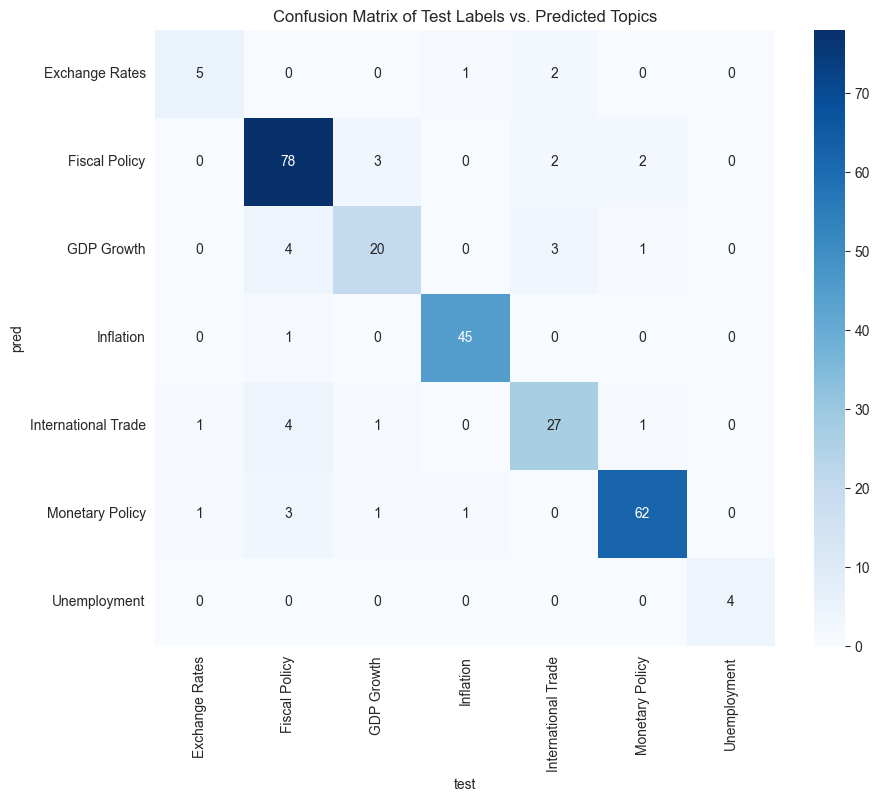

                     precision    recall  f1-score   support

     Exchange Rates       0.71      0.62      0.67         8
      Fiscal Policy       0.87      0.92      0.89        85
         GDP Growth       0.80      0.71      0.75        28
          Inflation       0.96      0.98      0.97        46
International Trade       0.79      0.79      0.79        34
    Monetary Policy       0.94      0.91      0.93        68
       Unemployment       1.00      1.00      1.00         4

           accuracy                           0.88       273
          macro avg       0.87      0.85      0.86       273
       weighted avg       0.88      0.88      0.88       273

Confusion Matrix:
[[ 5  0  0  1  2  0  0]
 [ 0 78  3  0  2  2  0]
 [ 0  4 20  0  3  1  0]
 [ 0  1  0 45  0  0  0]
 [ 1  4  1  0 27  1  0]
 [ 1  3  1  1  0 62  0]
 [ 0  0  0  0  0  0  4]]


In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

unique_labels = np.unique(labels)

conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('test')
plt.ylabel('pred')
plt.title('Confusion Matrix of Test Labels vs. Predicted Topics')
plt.show()

# Evaluate the model
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

In [14]:
import joblib

# Save the trained classifier
joblib_file = "hybrid_classifier_tfidf_2.joblib"
joblib.dump(clf, joblib_file)

['hybrid_classifier_tfidf_2.joblib']

In [15]:
vectorizer_path = 'tfidf_vectorizer.joblib'
joblib.dump(tfidf_vectorizer, vectorizer_path)

['tfidf_vectorizer.joblib']